In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
file_path = Path("C:/Users/Tirth/Downloads/PRODIGY/TASK 2/train.csv")

In [5]:
train_df = pd.read_csv(file_path)

In [6]:
print("Dataset Information:\n")
print(train_df.info())
print("\nFirst 5 rows of the dataset:\n")
print(train_df.head())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First 5 rows of the dataset:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4     

In [7]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [8]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [9]:
train_df.drop(columns=['Cabin'], inplace=True)

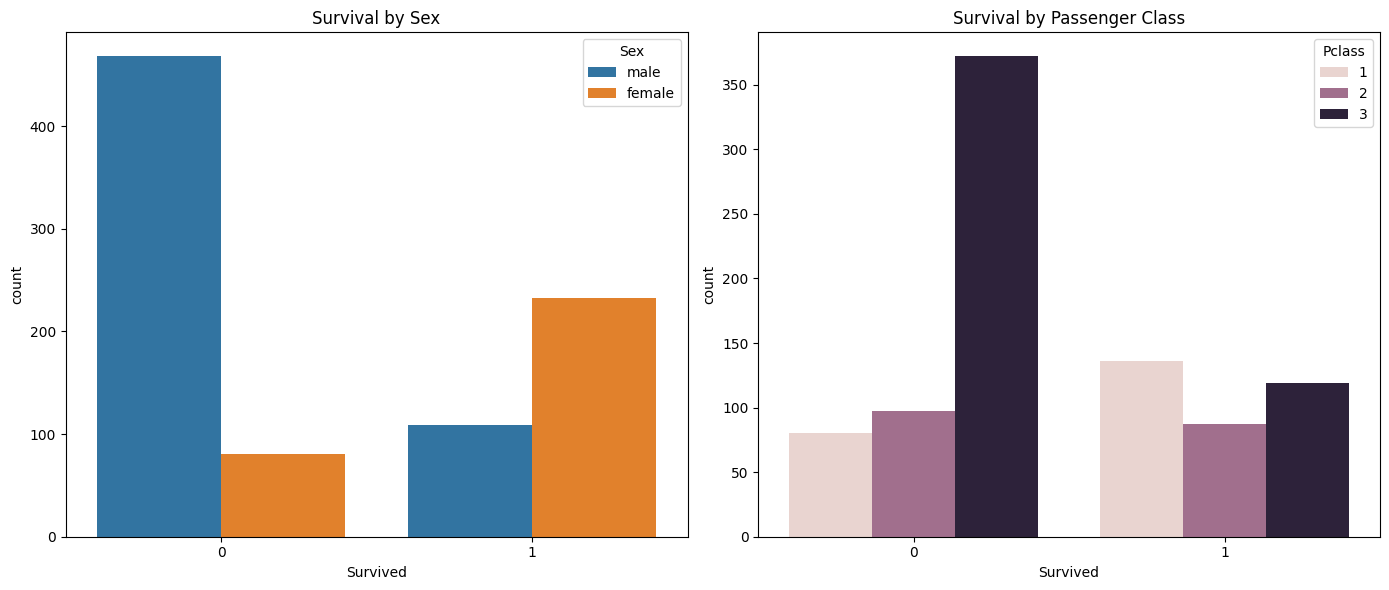

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='Survived', hue='Sex', data=train_df, ax=ax[0])
ax[0].set_title('Survival by Sex')

sns.countplot(x='Survived', hue='Pclass', data=train_df, ax=ax[1])
ax[1].set_title('Survival by Passenger Class')

plt.tight_layout()

plt.show()

In [11]:
sns.countplot(x='Survived', hue='Sex', data=train_df, ax=ax[0])
ax[0].set_title('Survival by Sex')

Text(0.5, 1.0, 'Survival by Sex')

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=train_df, ax=ax[1])
ax[1].set_title('Survival by Passenger Class')

Text(0.5, 1.0, 'Survival by Passenger Class')

In [13]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [14]:
print("\nSummary Statistics:\n")
print(train_df.describe())


Summary Statistics:

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


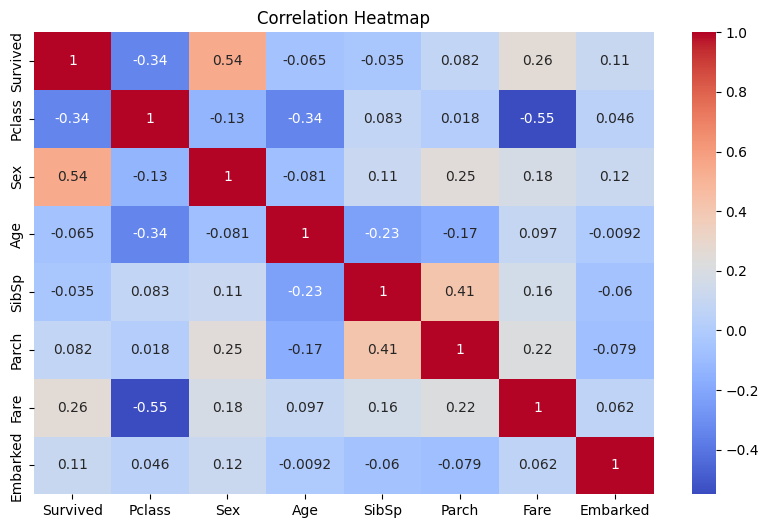

In [15]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

train_df_corr = train_df.drop(columns=['Name', 'Ticket', 'PassengerId'])

plt.figure(figsize=(10, 6))
sns.heatmap(train_df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
print("\nMissing values after cleaning:\n")
print(train_df.isnull().sum())


Missing values after cleaning:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


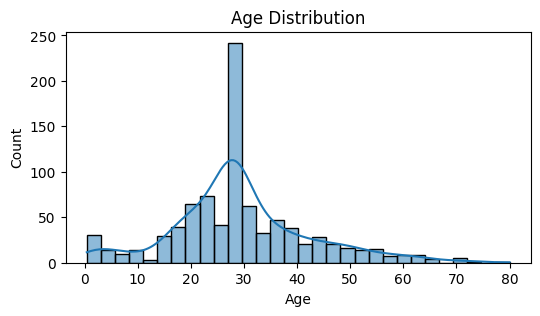

In [17]:
plt.figure(figsize=(6, 3))
sns.histplot(train_df["Age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

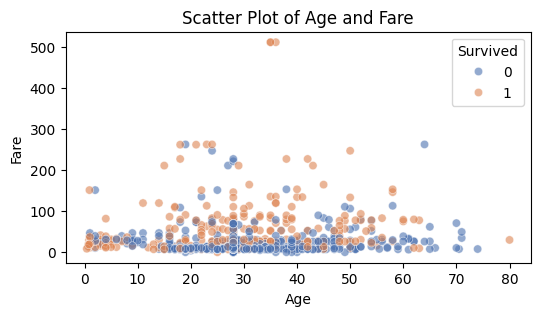

In [18]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=train_df, x="Age", y="Fare", hue="Survived", palette="deep", alpha=0.6)
plt.title("Scatter Plot of Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()